In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Part 1: Implementing PCA

In [2]:
# Retrieving images, flattening them all into vectors, then combining them.

In [3]:
directory = 'StarterFiles/Train1'

#flatten
X = plt.imread('StarterFiles/Train1/00001fa010.930831.jpg').reshape(-1)

In [4]:
for filename in os.listdir(directory):
    if (filename != 'StarterFiles/Train1/00001fa010.930831.jpg'):
        
        #read img from file into array 
        img = plt.imread(os.path.join(directory, filename))
        
        #flatten 
        x = img.reshape(-1)
        
        #stack arrays to create vector columns
        X = np.c_[X, x]

In [5]:
X.shape

(19500, 3773)

In [6]:
# Finding the mean vector.

In [7]:
vectorsum = X.sum(axis=1)
vectorsum
vectorsum = vectorsum / 3772
np.shape(vectorsum)

(19500,)

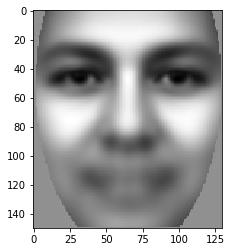

In [8]:
d = vectorsum
d = d.reshape(150, 130)
plt.imshow(d, interpolation='nearest') #display the image
plt.gray()
plt.show()

In [9]:
# Mean centering the input data (Original Matrix).

In [10]:
data = X.T - vectorsum
data = data.T
np.shape(data)

(19500, 3773)

In [11]:
# Finding the covariance matrix and applying eigen decomposition to it.
#cov = np.cov(data.T)
#eig_vals, eig_vecs = np.linalg.eig(cov)
#np.shape(eig_vecs)
#eig_vecs

In [12]:
#eig_vals

In [ ]:
u,s,v = np.linalg.svd(data)
u #these hold our eigenfaces

In [ ]:
u.shape

# Part 2: Displaying the top K eigenfaces

In [ ]:
eigenface1 = u[:, 0]
eigenface1 = eigenface1.reshape(150,130)
plt.imshow(eigenface1) #display the image
plt.gray()
plt.show()


In [ ]:
eigenface5 = u[:, 4]
eigenface5 = eigenface5.reshape(150,130)
plt.imshow(eigenface5) #display the image
plt.gray()
plt.show()

In [ ]:
eigenface7 = u[:, 6]
eigenface7 = eigenface7.reshape(150, 130)
plt.imshow(eigenface7) #display the image
plt.gray()
plt.show()

In [ ]:
eigenface9 = u[:, 8]
#eigenface9 = eigenface9.reshape(150, 130)
#plt.imshow(eigenface9) #display the image
#plt.gray()
#plt.show()
eigenface9.shape

In [ ]:
eigenface15 = u[:, 14]
eigenface15 = eigenface15.reshape(150, 130)
plt.imshow(eigenface15) #display the image
plt.gray()
plt.show()

In [ ]:
eigenface31 = u[:, 30]
eigenface31 = eigenface31.reshape(150, 130)
plt.imshow(eigenface31) #display the image
plt.gray()
plt.show()

In [ ]:
eigenface101 = u[:, 100]
eigenface101 = eigenface101.reshape(150, 130)
plt.imshow(eigenface101, interpolation='nearest') #display the image
plt.gray()
plt.show()

In [ ]:
fld5 = u[:, 250]
fld5 = fld5.reshape(150, 130)
plt.imshow(fld5) #display the image
plt.gray()
plt.show()

In [ ]:
fld6 = u[:, 350]
fld6 = fld6.reshape(150, 130)
plt.imshow(fld6) #display the image
plt.gray()
plt.show()

In [ ]:
fld7 = u[:, 500]
fld7 = fld7.reshape(150, 130)
plt.imshow(fld7) #display the image
plt.gray()
plt.show()

# Performing facial recognition

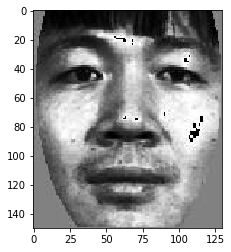

In [48]:
test1 = plt.imread('StarterFiles/Test1/00029fb010.941031.jpg')
plt.imshow(test1, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()


In [39]:
#keig = u[:, :600]
#np.shape(keig)

In [40]:
# Subtracting the mean vector from original matric.

In [41]:
#test1 = test1.reshape(-1)
#test1 = test1 - vectorsum
#test1 = test1.reshape(150, 130)

In [42]:
# Subtracting the mean vector of the image.

In [43]:
mean1 = np.mean(test1,axis=0)
test1_minus_mean = test1 - np.mean(test1,axis=0)
test1_minus_mean = test1.reshape(-1)
test1_minus_mean = test1.reshape(150, 130)

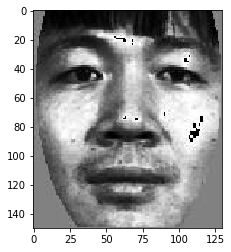

In [44]:
plt.imshow(test1, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

In [60]:
test1 = test1.reshape(-1)

K=15
testimg_weights = []
#get array of weights for test image (first K eigenvectors * chosen test face image's vector) 
for j in range(K): 
    #print(test1.shape)
    testimg_weights.append(np.matmul(u[:,j].T, test1))
testimg_weights

[4427.25466052173,
 -3372.55541995963,
 -1165.2936596499667,
 979.5962341592835,
 2442.209416232856,
 -57.16547388615436,
 -1312.6011131885643,
 3502.2052058594704,
 3362.9914983612384,
 -2303.661556076447,
 1038.4186715245198,
 -2560.268487814426,
 -819.019017163546,
 161.09760278225812,
 1537.429852538171]

In [61]:
#find weights of every face in training set

#create 2d array of weights vectors for each face in training set
train_weights = np.empty((X.shape[1], K), float)
#iterate through columns of X (training set)
for m in range(X.shape[1]):
    for j in range(K):
        train_weights[m,j] = np.matmul(u[:,j].T, X[:,m])
train_weights

array([[-2798.87030037,  2857.68371165, -2375.21219554, ...,
        -1569.82934806,  -561.97525787,  1776.778871  ],
       [-4134.66052625,   -52.65632269, -4348.05712554, ...,
         -728.68363265,  -813.52468499,  2583.88802116],
       [ 2348.73676361, -1308.0427956 , -1419.23284157, ...,
         -972.28087847,  -179.32649082,  1153.32336473],
       ...,
       [   87.71168346, -1661.58206363, -1573.7186141 , ...,
        -3544.89297199, -1266.8337078 ,  2785.49648522],
       [-3043.5695907 ,  -490.22292751, -3257.46319517, ...,
        -1244.44421197,   784.49103471,  1636.14588858],
       [  708.04131316,  5723.44399566, -1291.9714575 , ...,
        -1306.37364433,  -417.11553884,  1104.68835936]])

In [62]:
#find the training face with the minimum distance to the test face 
min_dist = np.linalg.norm(testimg_weights-train_weights[0])
min_dist

10979.265681667535

In [67]:
closest_img = 0
for i in range(1, train_weights.shape[1]):
    if (min_dist != np.linalg.norm(testimg_weights-train_weights[i])):
        closest_img_col = i
    min_dist = min(min_dist, np.linalg.norm(testimg_weights-train_weights[i]))

In [64]:
min_dist

5752.901509226563

In [68]:
closest_img_col

14

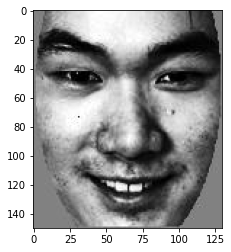

In [76]:
closest_img = X[:,closest_img_col].reshape(150,130)
plt.imshow(closest_img) #display the image
plt.gray()
plt.show()

In [ ]:
#Looks pretty close to the test1 image. 

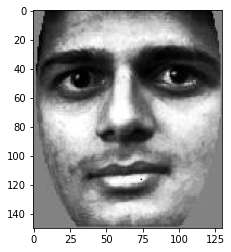

In [85]:
#random face for a sanity check:
random_img = X[:,3].reshape(150,130)
plt.imshow(random_img) #display the image
plt.gray()
plt.show()

In [128]:
def find_closest_face(path):
    testpic = plt.imread(path)
    
    testpic = testpic.reshape(-1)
    testpic_weights = []
    
    #get array of weights for test image (first K eigenvectors * chosen test face image's vector) 
    for j in range(K): 
        testpic_weights.append(np.matmul(u[:,j].T, testpic))
        testpic_weights

    #find the training face with the minimum distance to the test2 face 
    minimum_dist = np.linalg.norm(testpic_weights-train_weights[0])
    
    closest_pic = 0
    for p in range(1, train_weights.shape[1]):
        if (minimum_dist > np.linalg.norm(testpic_weights-train_weights[p])):
            closest_pic = p
            minimum_dist = np.linalg.norm(testpic_weights-train_weights[p])
    #print(closest_pic)
    
    print("Test image:")
    testpic = testpic.reshape(150,130)
    plt.imshow(testpic) #display the original test image
    plt.gray()
    plt.show()
    
    print("Training match:")
    closest_pic = X[:,closest_pic].reshape(150,130)
    plt.imshow(closest_pic) #display the closest image
    plt.gray()
    plt.show()
    
   

Test image:


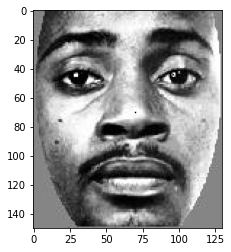

Training match:


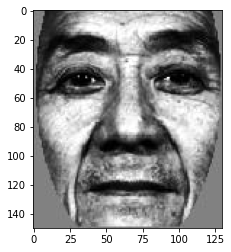

In [129]:
find_closest_face('StarterFiles/Test1/00358fa011.940422.jpg')

Test image:


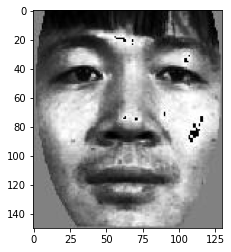

Training match:


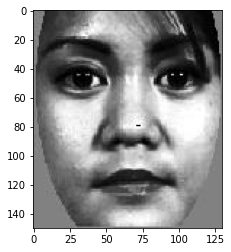

In [131]:
find_closest_face('StarterFiles/Test1/00029fb010.941031.jpg')